In [525]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# load the dataset
path = '/Users/peppermint/Desktop/codes/python/NetworkIntrusionDetection/Datasets/small_result230.csv'
df = read_csv(path)
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [526]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [527]:
df.tail()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
15096,80,6,1.519356e+09,46,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15097,80,6,1.519383e+09,277,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15098,80,6,1.519381e+09,331,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15099,80,6,1.519355e+09,313,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
15100,80,6,1.519383e+09,190,2,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [528]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [529]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [530]:
# define the  model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, batch_size=16, epochs=50, shuffle=True, verbose=2, validation_data=(X_test,y_test))
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))
model.summary()

Epoch 1/50
633/633 - 3s - loss: 1164638.0000 - accuracy: 0.9392 - val_loss: 1400779.8750 - val_accuracy: 0.9617 - 3s/epoch - 4ms/step
Epoch 2/50
633/633 - 2s - loss: 447682.5000 - accuracy: 0.9497 - val_loss: 541150.7500 - val_accuracy: 0.9713 - 2s/epoch - 3ms/step
Epoch 3/50
633/633 - 1s - loss: 473169.8750 - accuracy: 0.9478 - val_loss: 1389908.7500 - val_accuracy: 0.9615 - 1s/epoch - 2ms/step
Epoch 4/50
633/633 - 1s - loss: 507186.3750 - accuracy: 0.9511 - val_loss: 382645.7812 - val_accuracy: 0.9691 - 1s/epoch - 2ms/step
Epoch 5/50
633/633 - 2s - loss: 653685.5625 - accuracy: 0.9525 - val_loss: 1056853.6250 - val_accuracy: 0.9617 - 2s/epoch - 3ms/step
Epoch 6/50
633/633 - 2s - loss: 468963.9062 - accuracy: 0.9535 - val_loss: 223056.6406 - val_accuracy: 0.9769 - 2s/epoch - 3ms/step
Epoch 7/50
633/633 - 2s - loss: 420256.2812 - accuracy: 0.9527 - val_loss: 1450904.7500 - val_accuracy: 0.9617 - 2s/epoch - 3ms/step
Epoch 8/50
633/633 - 1s - loss: 460681.9688 - accuracy: 0.9566 - val_lo

156/156 [==============================] - 1s 3ms/step


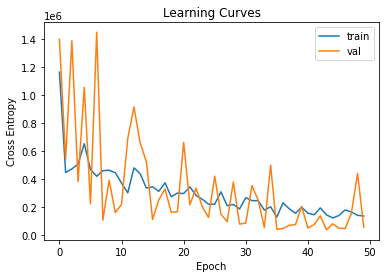

In [531]:
# predict test set
yhat = model.predict(X_test)
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [532]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat)
print('F1 score: %f' % f1)

Accuracy: 0.976124
Precision: 0.776923
Recall: 0.528796
F1 score: 0.629283


In [533]:
X_test.shape

(4984, 79)

In [534]:
X_test[0].shape

(79,)

In [535]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 36ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [536]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [537]:
NUM_TO_CONSIDER = 10
correct = 0
for got, expected in zip(model.predict(X_test[:NUM_TO_CONSIDER]), y_test[:NUM_TO_CONSIDER]):
    if int(got[0]) == int(expected):
        print(f"correct: {int(got[0])} == {int(expected)}")
        correct += 1

total_score = correct / NUM_TO_CONSIDER
print(f"total score: {total_score}")


1/1 [==============================] - 0s 22ms/step
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
correct: 1 == 1
correct: 0 == 0
correct: 0 == 0
correct: 0 == 0
total score: 1.0


In [538]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519349387.0,56705690,203,104,56083,189900,680,0,276.2709359606,291.6989844299,1935,0,1825.9615384615,320.3787783439,4337.8891959519,5.4139187796,185312.712418301,362882.704589828,1014075,25,56703383,280709.816831683,415824.191561832,1014075,440,56705665,550540.436893204,440061.419389244,1016698,36,0,0,0,0,4072,2092,3.5798876621,1.8340311175,0,1935,798.6461038961,794.0143633481,630458.809203012,0,0,1,1,0,0,0,1,0,801.2475570033,276.2709359606,1825.9615384615,0,0,0,0,0,0,203,56083,104,189900,8192,1281,101,20,0,0,0,0,0,0,0,0] # known_attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 53ms/step


1.0

In [539]:
# predict on unseen data "manually"
from sklearn.preprocessing import LabelEncoder

# define a row of new data
row = [80,6,1519348465.0,132,3,0,0,0,0,0,0,0,0,0,0,0,0,22727.2727272727,66,84.8528137424,126,6,132,66,84.8528137424,126,6,0,0,0,0,0,0,0,0,0,60,0,22727.2727272727,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2053,-1,0,20,0,0,0,0,0,0,0,0] # known attack
# make prediction
yhat = model.predict([row])
yhat[0][0]

1/1 [==============================] - 0s 60ms/step


0.0

In [540]:
from tensorflow import keras
from tensorflow.keras.models import Model

In [541]:
model.summary() # before

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               10240     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [543]:
model = Model(inputs=model.input, outputs=model.get_layer("dense_18").output)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18_input (InputLayer)  [(None, 79)]             0         
                                                                 
 dense_18 (Dense)            (None, 128)               10240     
                                                                 
Total params: 10,240
Trainable params: 10,240
Non-trainable params: 0
_________________________________________________________________


In [544]:
preds = model.predict(X_test[:10])
preds.shape

1/1 [==============================] - 0s 59ms/step


(10, 128)

# vectors are 128-D now (as opposed to 79 from before)

In [545]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [546]:
X_test[0].shape # old shape

(79,)

In [547]:
preds[0].shape # new shape

(128,)

In [548]:
from docarray import Document, DocumentArray

In [549]:
preds_da = DocumentArray()
for p, known in zip(preds, y_test):
    d = Document(embedding=p, known_label=known)
    preds_da.append(d)

preds_da.summary()

╭────────────────── Documents Summary ───────────────────╮
│                                                        │
│   Length                 10                            │
│   Homogenous Documents   True                          │
│   Common Attributes      ('id', 'tags', 'embedding')   │
│                                                        │
╰────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   10               False             │
│   id          ('str',)       10               False             │
│   tags        ('dict',)      10               False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [550]:
# save da
# preds_da.save("preds_da")

In [551]:
# load saved da
loaded_da = preds_da.load("/Users/peppermint/Desktop/codes/python/NetworkIntrusionDetection/preds_da")
loaded_da[-2]


📄 Document: b3e9dfbe0ed319c1ffdc34d9ddedd7b9
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 0}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯

In [552]:
len(loaded_da[0].embedding)

128

In [553]:
# q = Document(embedding=np.array([117731110.0,0.0,0.0,403584100.0,0.0,0.0,295227840.0,0.0,0.0,179446980.0,53391496.0,0.0,0.0,0.0,124327560.0,71830584.0,0.0,0.0,72986190.0,0.0,106479864.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298415330.0,0.0,0.0,396025250.0,0.0,0.0,102947610.0,0.0,0.0,117582870.0,0.0,0.0,0.0,227127780.0,0.0,0.0,150275800.0,0.0,0.0,0.0,153777810.0,14344424.0,0.0,0.0,2097115.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,79189256.0,38917170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60144972.0,0.0,134589550.0,0.0,0.0,262745200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124157110.0,0.0,0.0,19582238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31889718.0,0.0,319482400.0,0.0,59881576.0,102779810.0,0.0,174540140.0,0.0,0.0,188274480.0,0.0,0.0,0.0,87272200.0,0.0,0.0]))
# q.match(loaded_da, exclude_self=True)

In [554]:
q = loaded_da[-7] # correct
q.match(loaded_da, exclude_self=True)

📄 Document: 0634ddf19903b537c6c2db28502049f3
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 0}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 🔶 Matches
    ├── 📄 Document: 9fb0fd498d393ccbc4533d9c312119c5
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.06025791}})                                          │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 244062099e9036d3b1f9c8ffdb5d6c15
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.060725033}})                                         │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: d21c108c5178eb3fee4b3aa5ef75222a
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄[38;

In [555]:
q = preds_da[-4] # wrong
q.match(preds_da, exclude_self=True)


📄 Document: 55244076fc241e6bd7ac120fe7952df2
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 1}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 🔶 Matches
    ├── 📄 Document: 8105d44bf3e3f45500766e52ba2d31cf
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.008597434}})                                         │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 3c0b59b1067ddfdd8949fb8eb770f018
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 0.011925757}})                                         │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: f05db94d2384c91a4e2b9c7840dc4fc6
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄[38;2;43;0;86;48;2;4

In [556]:
q = preds_da[-5] # correct
q.match(preds_da, exclude_self=True)

📄 Document: 1d85f6e29c49dc12dfe3626d65b3652e
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tags      │ {'known_label': 0}                                               │
│ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
│           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
╰───────────┴──────────────────────────────────────────────────────────────────╯
└── 🔶 Matches
    ├── 📄 Document: b2a287c9b547ff6436b0b45251312a13
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 1.0728836e-06}})                                       │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: 5ccae15e4adc73d0a09229a84a78dec4
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄ │
    │   │           │ ▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄  │
    │   │ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
    │   │           │ {'value': 1.4305115e-06}})                                       │
    │   ╰───────────┴──────────────────────────────────────────────────────────────────╯
    ├── 📄 Document: f05db94d2384c91a4e2b9c7840dc4fc6
    │   ╭───────────┬──────────────────────────────────────────────────────────────────╮
    │   │ Attribute │ Value                                                            │
    │   ├───────────┼──────────────────────────────────────────────────────────────────┤
    │   │ adjacency │ 1                                                                │
    │   │ tags      │ {'known_label': 0}                                               │
    │   │ embedding │ ▄▄▄▄▄▄▄[38;2;43;0;86;48;2

In [557]:
da = DocumentArray.from_csv(path)
da.summary()

╭──────────── Documents Summary ────────────╮
│                                           │
│   Length                 15101            │
│   Homogenous Documents   True             │
│   Common Attributes      ('id', 'tags')   │
│                                           │
╰───────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    15101            False             │
│   tags        ('dict',)   15101            False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

In [558]:
# model.predict(np.array([v for k, v in da[0].tags.items() if k != "Label"]).astype("float32"))

In [559]:
import pandas as pd


df = pd.read_csv("/Users/peppermint/Desktop/codes/python/NetworkIntrusionDetection/Datasets/small_result230.csv")
df["Label"] = df["Label"].map(lambda x: 0 if x == "Benign" else 1)

In [560]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,52412,6,1.519359e+09,46,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
1,52416,6,1.519359e+09,1,2,0,0,0,0,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
2,443,6,1.519359e+09,117303745,12,10,1148,1471,517,0,...,20,79440.5,25166.637449,97236,61645,58533700.5,591071.265501,58951651,58115750,0
3,443,6,1.519359e+09,250,3,0,77,0,46,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0
4,52425,6,1.519359e+09,93,3,1,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,0


In [561]:
X_only = df.iloc[:, :-1].astype("float32")
y_only = df.iloc[:, -1].astype("float32")
y_only

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
15096    1.0
15097    1.0
15098    1.0
15099    1.0
15100    1.0
Name: Label, Length: 15101, dtype: float32

In [562]:
res = model.predict(X_only)
res.shape

472/472 [==============================] - 1s 2ms/step


(15101, 128)

In [563]:
embeddings_df = pd.DataFrame(res)
embeddings_df["Label"] = y_only
embeddings_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,87461240.0,0.0,0.0,164995264.0,0.0,0.0,7681.36084,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,86973384.0,0.0,0.0,164680752.0,0.0,0.0,86395.34375,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,109418888.0,0.0,0.0,168141408.0,0.0,0.0,0.00000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,87888144.0,0.0,0.0,165473328.0,0.0,0.0,441820.96875,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88171776.0,0.0,0.0,165785136.0,0.0,0.0,713556.62500,0.0,0.0


In [564]:
# embeddings_df.to_csv("embeddings_df.csv", index=0)

In [565]:
result = pd.concat([embeddings_df, df], axis=1)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [566]:
result = result.sample(frac=1, random_state=0)
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
10799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8,0.0,0.0,0,0,0.0,0.0,0,0,0
2732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0,0,86239131.0,0.0,86239131,86239131,0


In [567]:
import random
import time
from datetime import datetime
dates = []
def randomDate(start, end):
    frmt = '%d-%m-%Y %H:%M:%S'

    stime = time.mktime(time.strptime(start, frmt))
    etime = time.mktime(time.strptime(end, frmt))

    ptime = stime + random.random() * (etime - stime)
    dt = datetime.fromtimestamp(time.mktime(time.localtime(ptime)))
    return dt

for i in range(0 , len(result)):
    dates.append(randomDate("20-01-2018 13:30:00", "23-01-2018 04:50:34"))
dates

[datetime.datetime(2018, 1, 21, 19, 48, 23),
 datetime.datetime(2018, 1, 21, 8, 36, 32),
 datetime.datetime(2018, 1, 20, 20, 31, 46),
 datetime.datetime(2018, 1, 21, 4, 35, 54),
 datetime.datetime(2018, 1, 22, 0, 54, 48),
 datetime.datetime(2018, 1, 20, 14, 8, 35),
 datetime.datetime(2018, 1, 21, 18, 6, 8),
 datetime.datetime(2018, 1, 23, 3, 35, 12),
 datetime.datetime(2018, 1, 22, 14, 11, 57),
 datetime.datetime(2018, 1, 21, 1, 53, 56),
 datetime.datetime(2018, 1, 21, 9, 0, 18),
 datetime.datetime(2018, 1, 22, 4, 19, 18),
 datetime.datetime(2018, 1, 21, 2, 55, 23),
 datetime.datetime(2018, 1, 22, 18, 33, 33),
 datetime.datetime(2018, 1, 21, 4, 58, 41),
 datetime.datetime(2018, 1, 21, 8, 33, 56),
 datetime.datetime(2018, 1, 20, 19, 15, 6),
 datetime.datetime(2018, 1, 22, 7, 27, 10),
 datetime.datetime(2018, 1, 21, 2, 47, 53),
 datetime.datetime(2018, 1, 22, 1, 7, 17),
 datetime.datetime(2018, 1, 20, 13, 46, 16),
 datetime.datetime(2018, 1, 21, 7, 1, 47),
 datetime.datetime(2018, 1, 21,

In [568]:
result.insert(loc=len(result.columns)-1, column='dt', value=dates)
result.head(2)


,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
13002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-21 19:48:23,0
8137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,86075433.0,0.0,86075433,86075433,2018-01-21 08:36:32,0


In [570]:
result.sort_values(by="dt", inplace=True)
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:11,0
5789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,86574190.0,0.0,86574190,86574190,2018-01-20 13:30:18,0


In [571]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
1361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:49:58,0
4362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:27,0


In [572]:
result.iloc[:, :128].head(2)

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,57801.949219,0.0,88252592.0,0.0,0.0,165605168.0,0.0,0.0,314195.59375,0.0
5789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,102739480.0,0.0,0.0,244318944.0,0.0,0.0,0.00000,0.0


In [573]:
result.head(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
6822,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-20 13:30:11,0
5789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,86574190.0,0.0,86574190,86574190,2018-01-20 13:30:18,0


In [574]:
result.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,dt,Label
1361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:49:58,0
4362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0,2018-01-23 04:50:27,0


In [579]:
# result.to_csv("embeddings_df_with_details.csv", index=0)

## in app

In [576]:
da = DocumentArray.load("index")
da.summary()

╭────────────────── Documents Summary ───────────────────╮
│                                                        │
│   Length                 15101                         │
│   Homogenous Documents   True                          │
│   Common Attributes      ('id', 'tags', 'embedding')   │
│                                                        │
╰────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   15101            False             │
│   id          ('str',)       15101            False             │
│   tags        ('dict',)      15101            False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [577]:
da_df = da.to_dataframe()
da_df.head(2)

,id,parent_id,granularity,adjacency,blob,tensor,mime_type,text,weight,uri,tags,offset,location,embedding,modality,evaluations,scores,chunks,matches
0,72b63ae9561c28d82ff1bd65e506b39a,None,None,None,None,None,None,None,None,None,"{'known_label': 0.0, 'dt': '2022-01-03 04:23:2...",None,None,"[176836910.0, 0.0, 0.0, 0.0, 167899140.0, 4549...",None,None,None,None,None
1,b9004d1d6dae36e6ff435eba75b28220,None,None,None,None,None,None,None,None,None,"{'known_label': 0.0, 'dt': '2022-01-03 05:43:1...",None,None,"[87679176.0, 0.0, 0.0, 0.0, 173225900.0, 28072...",None,None,None,None,None


In [578]:
hours = []

for i in range(len(da_df)):
    tags = da_df.loc[i, "tags"]
    print(tags)
    hours.append(tags.get("dt"))

da_df["hour"] = hours
da_df.head()

{'known_label': 0.0, 'dt': '2022-01-03 04:23:25.828911600'}
{'known_label': 0.0, 'dt': '2022-01-03 05:43:17.453751600'}
{'dt': '2022-01-03 04:49:19.585232400', 'known_label': 0.0}
{'dt': '2022-01-03 04:21:32.635670400', 'known_label': 0.0}
{'known_label': 0.0, 'dt': '2022-01-03 03:23:21.258222000'}
{'known_label': 1.0, 'dt': '2022-01-03 05:10:01.750458000'}
{'dt': '2022-01-03 03:30:02.511684000', 'known_label': 0.0}
{'known_label': 0.0, 'dt': '2022-01-03 07:08:03.062421600'}
{'dt': '2022-01-03 07:42:33.487502400', 'known_label': 0.0}
{'dt': '2022-01-03 03:04:03.115743600', 'known_label': 1.0}
{'dt': '2022-01-03 06:20:01.681098000', 'known_label': 0.0}
{'dt': '2022-01-03 04:13:52.173688800', 'known_label': 0.0}
{'known_label': 0.0, 'dt': '2022-01-03 04:32:39.683360400'}
{'dt': '2022-01-03 07:24:17.183181600', 'known_label': 0.0}
{'known_label': 0.0, 'dt': '2022-01-03 00:34:05.838477600'}
{'dt': '2022-01-03 00:41:49.323832800', 'known_label': 0.0}
{'known_label': 0.0, 'dt': '2022-01-03 0

,id,parent_id,granularity,adjacency,blob,tensor,mime_type,text,weight,uri,tags,offset,location,embedding,modality,evaluations,scores,chunks,matches,hour
0,72b63ae9561c28d82ff1bd65e506b39a,None,None,None,None,None,None,None,None,None,"{'known_label': 0.0, 'dt': '2022-01-03 04:23:2...",None,None,"[176836910.0, 0.0, 0.0, 0.0, 167899140.0, 4549...",None,None,None,None,None,2022-01-03 04:23:25.828911600
1,b9004d1d6dae36e6ff435eba75b28220,None,None,None,None,None,None,None,None,None,"{'known_label': 0.0, 'dt': '2022-01-03 05:43:1...",None,None,"[87679176.0, 0.0, 0.0, 0.0, 173225900.0, 28072...",None,None,None,None,None,2022-01-03 05:43:17.453751600
2,960457c628a0ce4dc65daf0e0af03893,None,None,None,None,None,None,None,None,None,"{'dt': '2022-01-03 04:49:19.585232400', 'known...",None,None,"[114198136.0, 0.0, 0.0, 0.0, 194986510.0, 4633...",None,None,None,None,None,2022-01-03 04:49:19.585232400
3,8c1774bea4094f0cf6765adcabb0c400,None,None,None,None,None,None,None,None,None,"{'dt': '2022-01-03 04:21:32.635670400', 'known...",None,None,"[176751710.0, 0.0, 0.0, 0.0, 167983890.0, 4559...",None,None,None,None,None,2022-01-03 04:21:32.635670400
4,1ba9f7897922a55f46e76a29a1fa8a95,None,None,None,None,None,None,None,None,None,"{'known_label': 0.0, 'dt': '2022-01-03 03:23:2...",None,None,"[176607280.0, 0.0, 0.0, 0.0, 168163310.0, 4573...",None,None,None,None,None,2022-01-03 03:23:21.258222000
